Outlier:

An outlier is an observation which deviates so much from other observations as to arouse suspicions that it was generated  by a different mechanism. (Unusual / Extreme values)

Methods to determine Outliers:

Visual methods:

1. Scatter PLot
2. Box PLot 

Numerical methods:

1. IQR 
2. Mean +- 2sigma
3. Percentile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import interactive
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Dataset _Heart disease.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

We can see there are many outliers present in the dataset. We will do our analysis on tortChol column.

In [5]:
df['totChol'].head()

0    195.0
1    250.0
2    245.0
3    225.0
4    285.0
Name: totChol, dtype: float64

# **Using Scatter Plot**

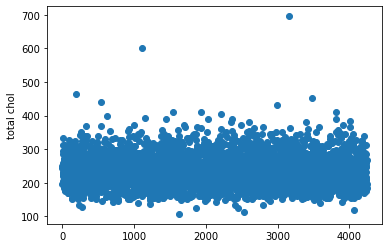

In [6]:
"""Scatter Plot"""
plt.scatter(df.index, df.totChol)
plt.ylabel("total chol")
interactive(True)
plt.show()

Visually we can infer there are some extreme values in 'totChol

# **Using Box Plot**

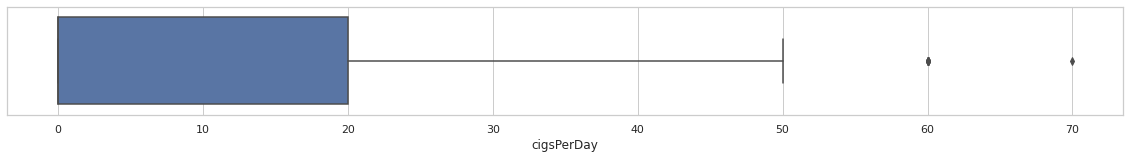

In [7]:
"""Box Plot"""
import seaborn as sns
plt.figure(figsize=(20,2))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['cigsPerDay'])

In [8]:
df[df['cigsPerDay'] > 50]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
327,1,56,1.0,1,60.0,0.0,0,0,0,246.0,125.0,79.0,29.64,70.0,85.0,0
721,1,59,1.0,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0
1054,1,58,2.0,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0
1452,1,39,1.0,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0
1468,1,50,1.0,1,60.0,0.0,0,1,0,340.0,134.0,95.0,30.46,85.0,86.0,0
1488,1,37,4.0,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0
1849,1,48,1.0,1,60.0,0.0,0,0,0,252.0,104.0,73.5,23.03,70.0,77.0,0
2709,1,46,1.0,1,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.0,0
2710,1,49,2.0,1,60.0,0.0,0,0,0,213.0,123.0,75.0,24.84,70.0,NaN,1
3008,1,40,3.0,1,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0


# **Using IQR**

In [9]:

def out_iqr(x):
    Q3 = np.nanpercentile(x , 75)
    Q1 = np.nanpercentile(x , 25)
    IQR =  Q3 - Q1 
    Upper_Range = (IQR * 1.5 + Q3)
    Lower_Range = (Q1 - IQR * 1.5)

    outliers = []
    for i in x:
        if i >= Upper_Range or i <= Lower_Range:
          outliers.append(i)

    return outliers
    
out_iqr(df['cigsPerDay'])

[60.0,
 50.0,
 60.0,
 60.0,
 50.0,
 60.0,
 50.0,
 60.0,
 60.0,
 50.0,
 60.0,
 50.0,
 60.0,
 60.0,
 50.0,
 70.0,
 60.0,
 60.0]

# **Using Mean +- 2sigma**

*   How much outlier to identify depends on the alpha level - 1*sigma / 2*sigma / 3*sigma




In [10]:
def out_mean(x):
    mu = np.nanmean(x)
    sigma = np.std(x)
    Lower_Range = mu - 2*sigma
    Upper_Range = mu + 2*sigma 
    outliers = []
    
    for i in x:
        if i >= Upper_Range or i <= Lower_Range:
          outliers.append(i)

    return outliers

out_mean(df['cigsPerDay'])

[35.0,
 43.0,
 40.0,
 43.0,
 43.0,
 43.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 43.0,
 43.0,
 43.0,
 40.0,
 40.0,
 60.0,
 40.0,
 35.0,
 35.0,
 43.0,
 40.0,
 45.0,
 40.0,
 50.0,
 40.0,
 43.0,
 40.0,
 35.0,
 43.0,
 35.0,
 43.0,
 40.0,
 43.0,
 60.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 60.0,
 35.0,
 40.0,
 43.0,
 35.0,
 43.0,
 40.0,
 43.0,
 40.0,
 38.0,
 50.0,
 40.0,
 40.0,
 60.0,
 50.0,
 60.0,
 60.0,
 43.0,
 43.0,
 40.0,
 40.0,
 40.0,
 43.0,
 40.0,
 35.0,
 40.0,
 40.0,
 40.0,
 43.0,
 35.0,
 35.0,
 40.0,
 50.0,
 60.0,
 40.0,
 43.0,
 35.0,
 43.0,
 35.0,
 40.0,
 43.0,
 35.0,
 35.0,
 35.0,
 43.0,
 50.0,
 43.0,
 35.0,
 40.0,
 43.0,
 43.0,
 40.0,
 40.0,
 43.0,
 40.0,
 35.0,
 60.0,
 60.0,
 40.0,
 35.0,
 43.0,
 40.0,
 43.0,
 50.0,
 40.0,
 40.0,
 40.0,
 43.0,
 43.0,
 40.0,
 45.0,
 43.0,
 43.0,
 43.0,
 40.0,
 43.0,
 40.0,
 40.0,
 40.0,
 70.0,
 43.0,
 43.0,
 40.0,
 35.0,
 40.0,
 43.0,
 43.0,
 43.0,
 40.0,
 40.0,
 40.0,
 43.0,
 40.0,
 40.0,
 43.0,
 43.0,
 43.0,

# **Percentile Method**
*   The below example is only for high value outliers
*   For low value outliers, cutoff will be (100 - below given percentile value)


In [11]:
def out_perc(x, cutoff):
    outliers = []
    for i in x:
        perc = np.nanpercentile(x,cutoff)
        if i >= perc :
            outliers.append(i)
    return outliers

out_perc(df['cigsPerDay'], 99)

[43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 60.0,
 43.0,
 45.0,
 50.0,
 43.0,
 43.0,
 43.0,
 43.0,
 60.0,
 60.0,
 43.0,
 43.0,
 43.0,
 50.0,
 60.0,
 50.0,
 60.0,
 60.0,
 43.0,
 43.0,
 43.0,
 43.0,
 50.0,
 60.0,
 43.0,
 43.0,
 43.0,
 43.0,
 50.0,
 43.0,
 43.0,
 43.0,
 43.0,
 60.0,
 60.0,
 43.0,
 43.0,
 50.0,
 43.0,
 43.0,
 45.0,
 43.0,
 43.0,
 43.0,
 43.0,
 70.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 60.0,
 45.0,
 43.0,
 60.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0]